# Proposal

## Title : Using Resting Blood Pressure and Maximum Heart Rate to Diagnose Heart Disease in Patients from Cleveland.

## Introduction:
For our data analysis, we will look at the two predictors of resting blood pressure and maximum heart rate. High resting blood pressure has been shown to cause heart disease in several ways, such as left ventricular hypertrophy, which can reduce the function of the heart. 120/80 is the optimal blood pressure of humans. Maximum heart rate achieved during exercise has been demonstrated to be inversely linked to the chances of one developing heart disease as it represents the fitness of one's heart and the ability to handle exercise. Therefore, our question is, how does resting blood pressure and maximum heart rate influence the diagnosis of heart disease, and are they major contributors? 
    
We’re using preprocessed data from the Cleveland database on heart disease,  originally containing 76 attributes, but we chose from a subset of 14. The 14 attributes include ‘age’, ‘sex’, ‘cp’ or chest pain, ‘trestbps’ or resting blood pressure on admission to the hospital, ‘chol’ or serum cholesterol, ‘fbs’ or fasting blood sugar 120 mg/dl, ‘restecg’ or resting electrocardiographic results, ‘thalac’ or maximum heart rate achieved, ‘exang’ or exercise induced angina, ’oldpeak’ or ST depression induced by exercise relative to rest, ‘slope’ the slope of the peak exercise ST segment, ‘ca’ or number of major vessels (0-3) colored by fluorosopy, ‘thal’: 3 = normal; 6 = fixed defect; 7 = reversible defect, and ‘num’ or diagnosis of heart disease. 

## Preliminary exploratory data analysis:
Found below!

## Methods:
We decided on using resting blood pressure and maximum heart rate achieved, as they were both numerical and had the largest difference in the true and false mean values. Other variables will be excluded from the primary analysis to maintain focus and simplicity. We will be using classification! First we must standardize our data, and go through many steps of tuning our classifier, fitting the data, creating our models and recipe and choosing our best k value in order to prep our classifying model. After evaluating our classifying model’s accuracy, precision and recall using the training data, we will determine if it is ready to run with the test data with our chosen K nearest neighbour value.

The coefficients are going to be visualized using a coefficient scatter plot to show the impact of each predictor (maximum heart rate and resting blood pressure) on the likelihood of having heart disease.



## Expected outcomes and significance:
We expect to find a correlation that those with high blood pressure and low maximum heart rate are more likely to get diagnosed with heart disease. Such findings could help medical practitioners prevent such diseases by realizing the signs much earlier in patients' lives, and could work on developing treatments on lowering resting blood pressure and increasing maximum heart rate.
    
Future questions that this may introduce would be:
1. Which of the two factors has a greater impact on the probability of being diagnosed with heart disease?
2. What treatments could be invented to prevent heart disease?
3. How many people currently in Cleveland are at a risk for heart disease, based on these two variables?


# Preliminary exploratory data analysis:

## Step 1 : Load Libraries

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## Step 2 : Read Data + Split into training & testing set

In [7]:
set.seed(123)
#read data
url<-"https://raw.githubusercontent.com/gracieS02/group_proposal_data/main/processed.cleveland.data?token=GHSAT0AAAAAACPGZWSBYOQE5DMJQJJQS2SAZPIZ32A"
download.file(url, "processed_cleveland.csv")

#rename columns
cleveland_data <- read_csv("processed_cleveland.csv", 
                           col_name = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

#clean and wrangle data
cleveland_data[cleveland_data == "?"] <- NA

cleveland_data <- mutate(cleveland_data, diagnose = ifelse(is.na(num), NA, (num > 0)), diagnose = as.factor(diagnose))

#splitting the dataframe into training and testing sets
cleveland_split <- initial_split(cleveland_data, prop = 3/4, strata = num)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)


# #sex: 1 = male; 0 = female

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnose
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,FALSE
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,FALSE
44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0,FALSE


## Step 3 : Training Data Summary

In [8]:
#number of observations in different classes group by diagnose or not 

cleveland_summary <- cleveland_training |>
                    group_by(diagnose) |>
                    summarize(min_age = min(age), max_age = max(age), mean_age = mean(age), 
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol), 
                              min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach), 
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                              number_of_patients = n(), num_of_missing_values = sum(rowSums(is.na(cur_data())) > 0))
                    

cleveland_summary


     

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `num_of_missing_values = sum(rowSums(is.na(cur_data())) > 0)`.
ℹ In group 1: `diagnose = FALSE`.
Caused by warning:
! `cur_data()` was deprecated in dplyr 1.1.0.
ℹ Please use `pick()` instead.”


diagnose,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,min_thalach,max_thalach,mean_thalach,min_trestbps,max_trestbps,mean_trestbps,number_of_patients,num_of_missing_values
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
FALSE,29,76,52.60656,126,564,244.6967,96,202,157.9918,94,180,128.9836,122,2
TRUE,38,70,56.94175,131,407,249.0777,71,195,137.2524,108,192,135.4757,103,2


## Step 4: Visualization

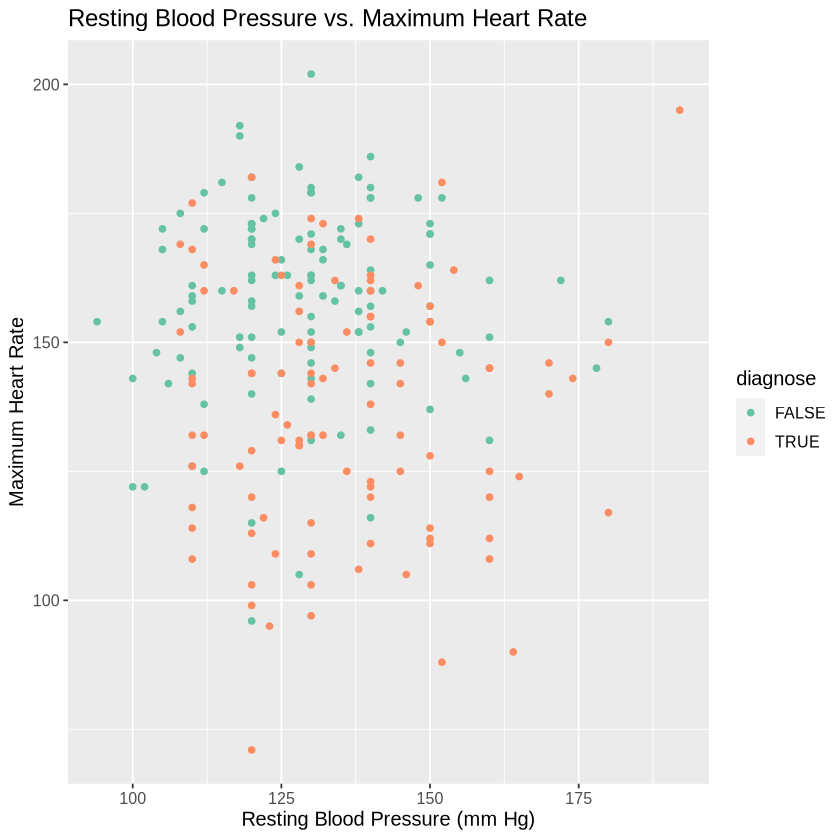

In [9]:

#the relationship between resting blood pressure & maximum heart rate achieved, colored with diagnose or not
cleve_plot <- ggplot(cleveland_training, aes(x=trestbps, y=thalach, color=diagnose)) +
      geom_point() +
      xlab("Resting Blood Pressure (mm Hg)") +
      ylab("Maximum Heart Rate") +
      ggtitle("Resting Blood Pressure vs. Maximum Heart Rate") +
      theme(text = element_text(size = 12)) +
      scale_color_brewer(palette = "Set2")

cleve_plot

